In [2]:
import os
os.environ.setdefault("TF_CPP_MIN_LOG_LEVEL", "2")  # Report only TF errors by default
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dataset import Dataset
from pipeline import Pipeline
from visualizations import Visualizer
from sklearn.linear_model import Ridge
import sklearn.preprocessing
from sklearn.svm import LinearSVR, SVR
from sklearn.decomposition import PCA, KernelPCA
from scikeras.wrappers import KerasRegressor
from sklearn.metrics import mean_squared_error
from sktime.performance_metrics.forecasting import mean_squared_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError
rmse = MeanSquaredError(square_root = True)
from scipy.linalg import LinAlgWarning
import sklearn.model_selection
import warnings
# Filter out LinAlgWarning
warnings.filterwarnings("ignore", category=LinAlgWarning)
#controling whether tensorflow does recognize GPU
tf.config.get_visible_devices("GPU")
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
#Inititate processing pipeline
pipeline = Pipeline(crypto_tick = "btc")
#Initiate visualizer
visualizer = Visualizer()

In [4]:
print("Missing values distribution:")
visualizer.get_missing_columns(data = pipeline.data)

Missing values distribution:


{'BTC / Capitalization, market, estimated supply, USD': [3092, '% 70.594'],
 'BTC / Volatility, daily returns, 180d': [11, '% 0.251'],
 'Wiki_btc_search': [1640, '% 37.443'],
 'Close_^DJI': [1360, '% 31.05'],
 'Close_^GSPC': [1360, '% 31.05'],
 'Close_GC=F': [1363, '% 31.119'],
 'Close_^VIX': [1360, '% 31.05'],
 'Close_^IXIC': [1360, '% 31.05'],
 'Close_SMH': [1360, '% 31.05'],
 'Close_VGT': [1360, '% 31.05'],
 'Close_XSD': [1360, '% 31.05'],
 'Close_IYW': [1360, '% 31.05'],
 'Close_FTEC': [2067, '% 47.192'],
 'Close_IGV': [1360, '% 31.05'],
 'Close_QQQ': [1360, '% 31.05'],
 'Wiki_crypto_search': [1640, '% 37.443'],
 'USD_EUR_rate': [161, '% 3.676'],
 'BTC-USD': [1353, '% 30.89']}

/tmp/ipykernel_1452/3485490685.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


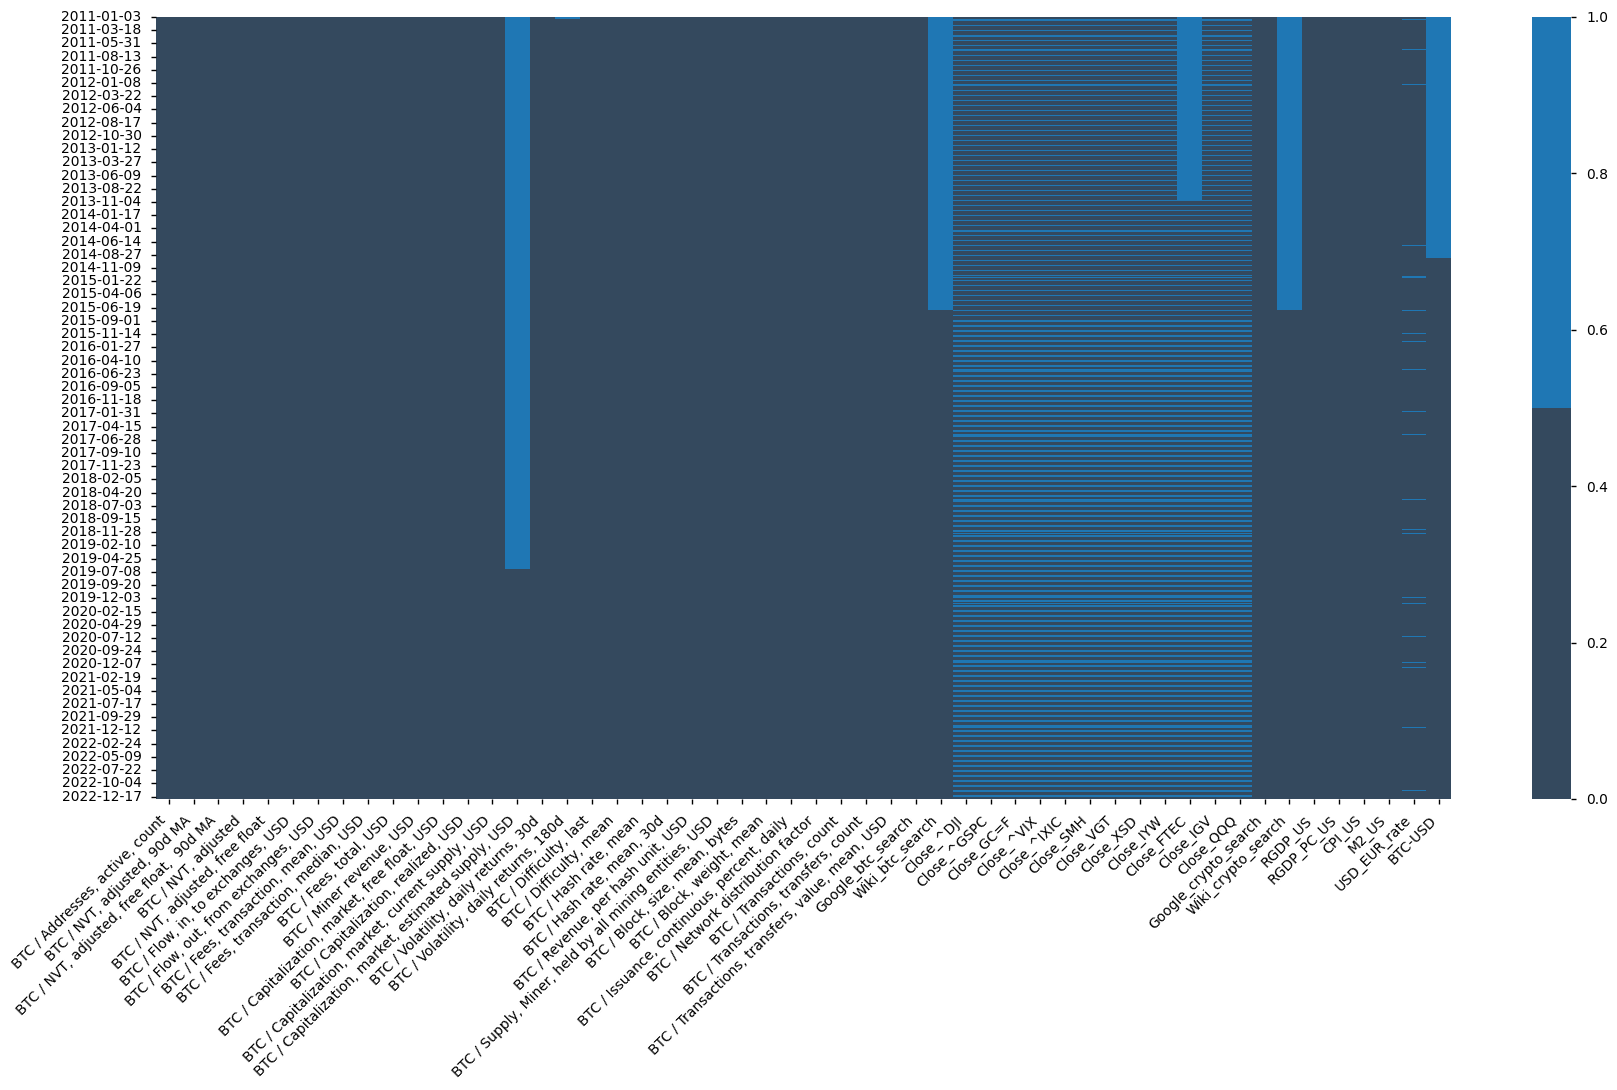

In [5]:

fig = visualizer.draw_missing_data(data = pipeline.data)
plt.tight_layout()
fig.savefig("./../text/Figures/BTC_missing_1.pdf", dpi=300, format="pdf")

fig.show()

In [6]:
pipeline.set_beginning(start_date = "2014-9-17")

/tmp/ipykernel_1452/2049177157.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


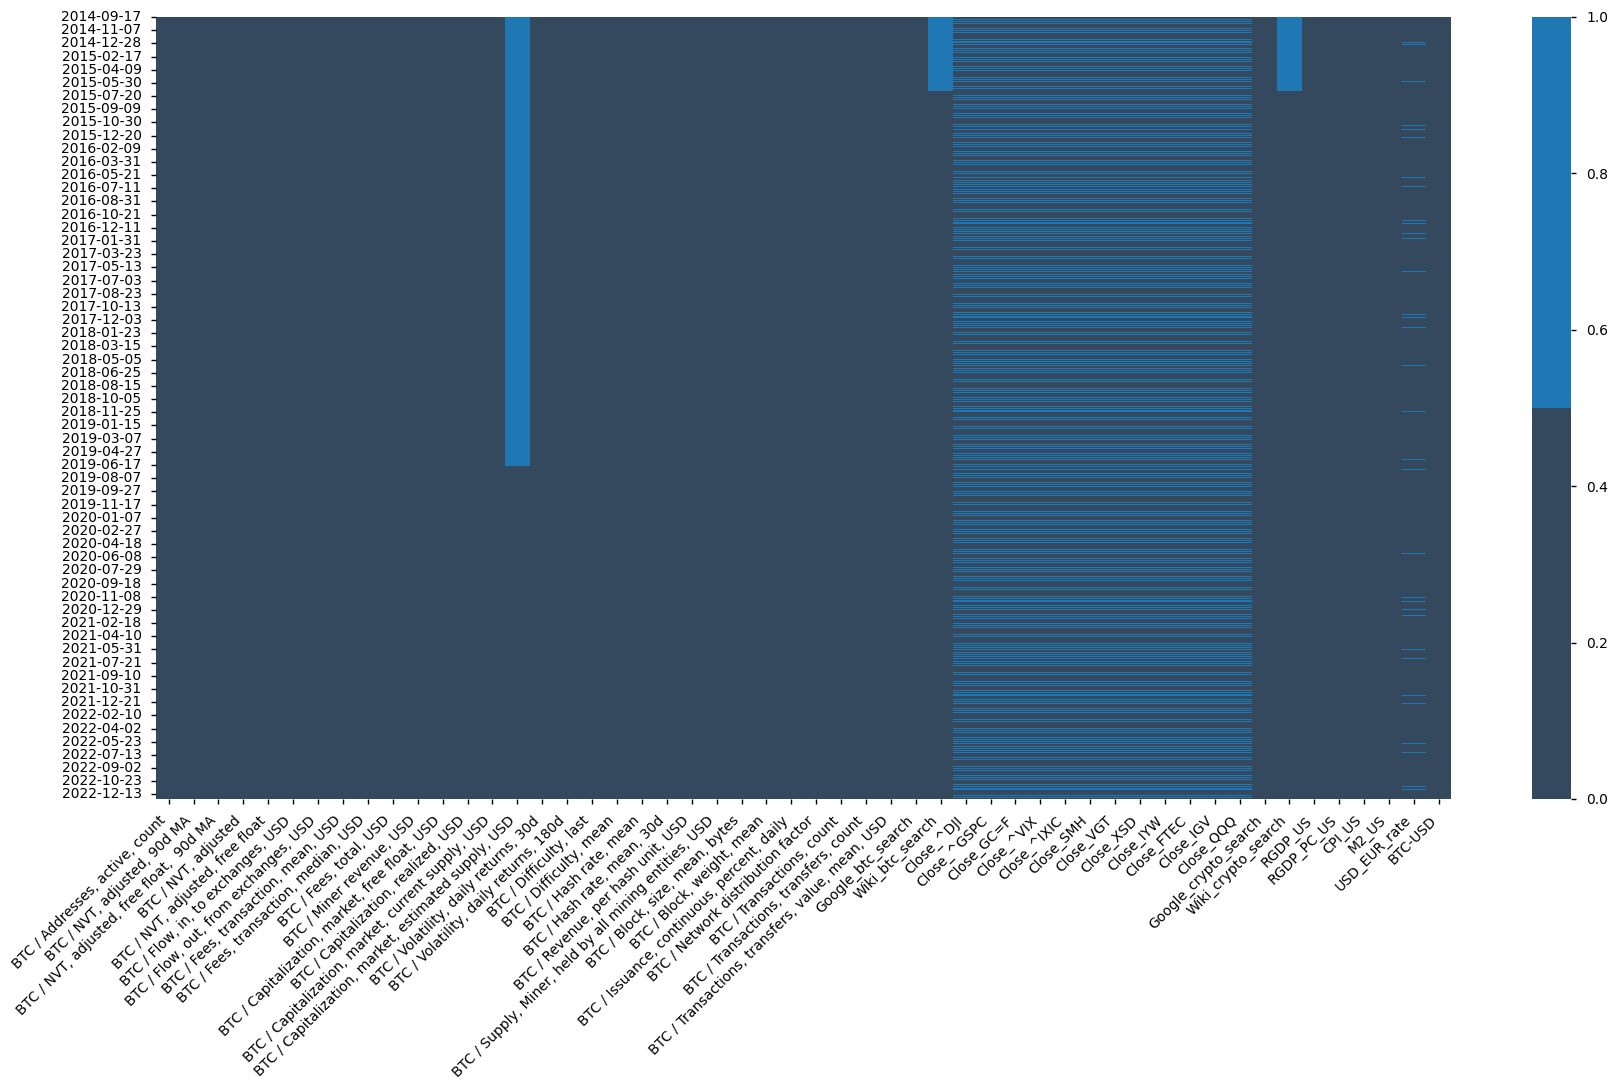

In [7]:
fig = visualizer.draw_missing_data(data = pipeline.data)
plt.tight_layout()
fig.savefig("../text/Figures/BTC_missing_2.pdf", dpi=300, format="pdf")
fig.show()

In [8]:
pipeline.preprocess_dataset()

/tmp/ipykernel_1452/523243249.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


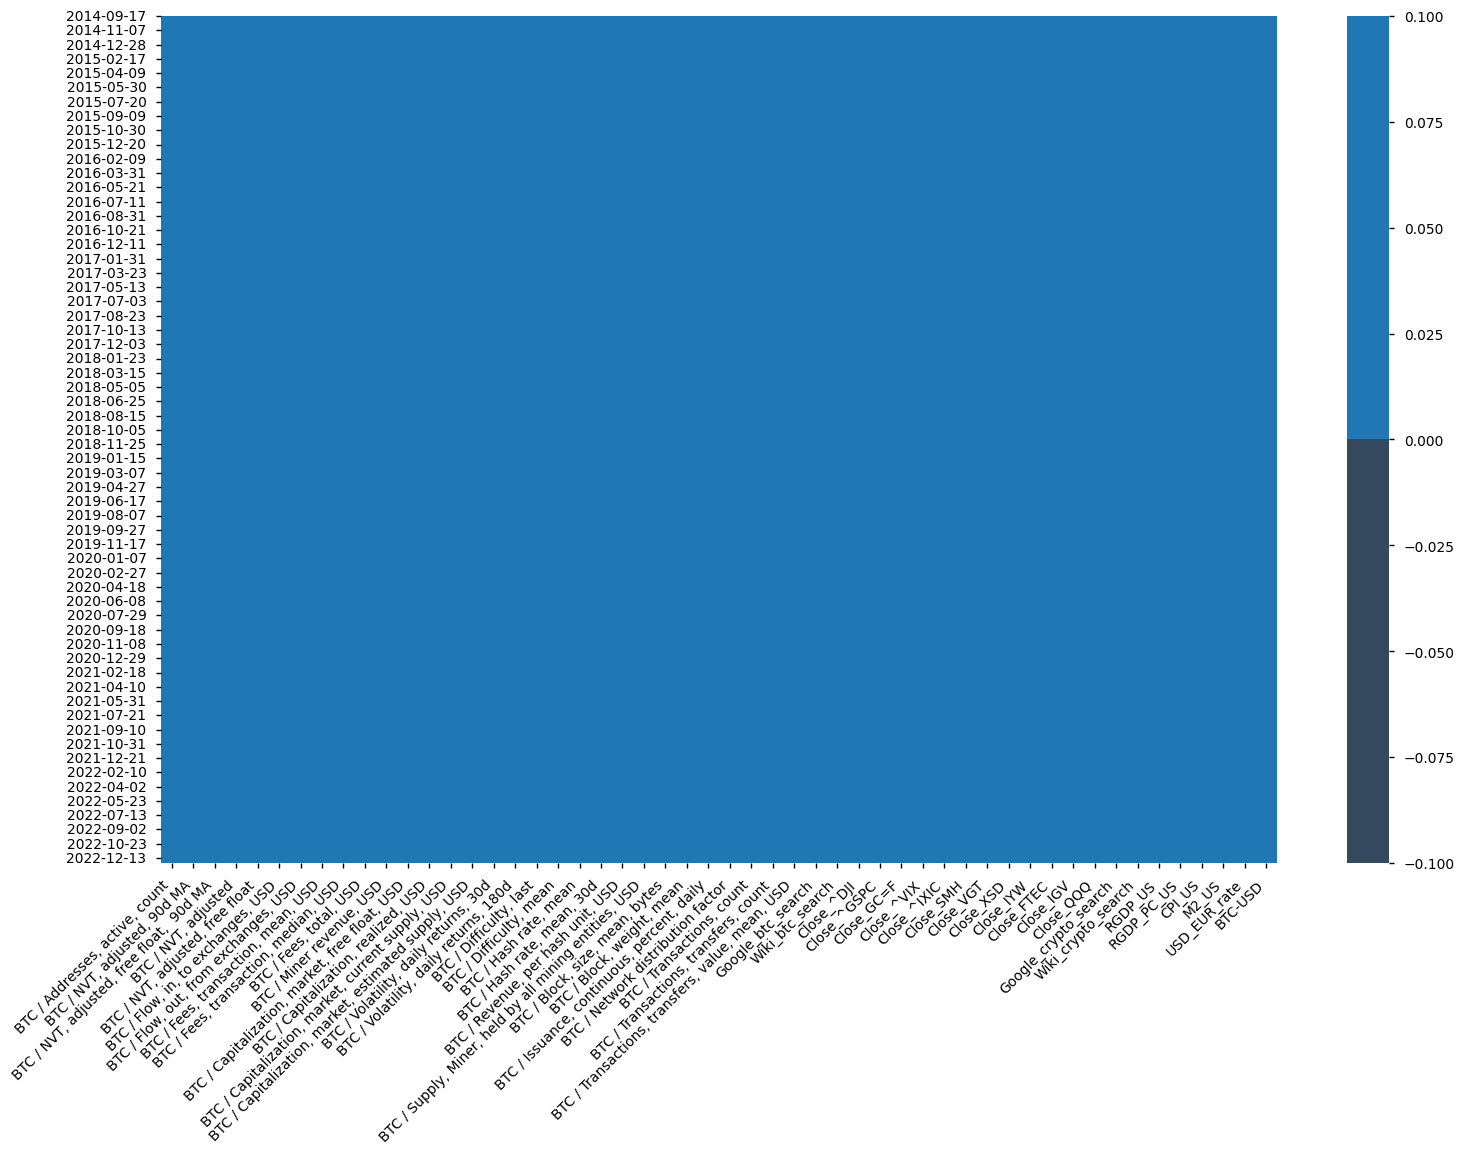

In [9]:
fig = visualizer.draw_missing_data(data = pipeline.data)
fig.show()

In [10]:
pipeline.shift_target()

In [11]:
pipeline.data_10d_shift

,"BTC / Addresses, active, count","BTC / NVT, adjusted, 90d MA","BTC / NVT, adjusted, free float, 90d MA","BTC / NVT, adjusted","BTC / NVT, adjusted, free float","BTC / Flow, in, to exchanges, USD","BTC / Flow, out, from exchanges, USD","BTC / Fees, transaction, mean, USD","BTC / Fees, transaction, median, USD","BTC / Fees, total, USD",...,Close_QQQ,Google_crypto_search,Wiki_crypto_search,RGDP_US,RGDP_PC_US,CPI_US,M2_US,USD_EUR_rate,BTC-USD,target
2014-09-17,191063.0,82.176970,76.651156,103.567097,96.602951,1.065752e+07,9.743524e+06,0.069971,0.045634,5494.516757,...,92.093697,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2958,457.334015,399.519989
2014-09-18,190890.0,76.826435,71.646822,75.335079,70.256013,1.696480e+07,1.359548e+07,0.068289,0.042688,5214.342615,...,92.787651,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2913,424.440002,377.181000
2014-09-19,172255.0,70.675713,65.897688,53.588317,49.965484,1.770344e+07,1.694158e+07,0.060801,0.039389,4261.732292,...,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,394.795990,375.467010
2014-09-20,169941.0,73.687502,68.691994,74.395015,69.351542,9.387692e+06,8.728492e+06,0.066003,0.041104,4235.264753,...,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,408.903992,386.944000
2014-09-21,200712.0,72.300627,67.387059,97.596787,90.964085,1.050540e+07,1.089809e+07,0.063093,0.040040,3638.427361,...,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,398.821014,383.614990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-16,893040.0,63.638479,46.708248,92.241011,67.701429,3.249423e+08,5.647839e+08,1.104805,0.457664,285957.077723,...,271.717651,26.035326,4349.0,21989.981,65799.0,6.516674,21438.7,1.0610,16647.484375,16919.804688
2022-12-17,967830.0,64.715648,47.484694,152.352954,111.788007,2.299792e+08,3.900930e+08,1.077419,0.459618,281394.393781,...,271.717651,26.035326,4093.0,21989.981,65799.0,6.516674,21438.7,1.0610,16795.091797,16717.173828
2022-12-18,783263.0,65.484320,48.038009,200.559814,147.126736,1.658453e+08,1.982145e+08,0.905575,0.376875,188281.093604,...,271.717651,26.035326,4594.0,21989.981,65799.0,6.516674,21438.7,1.0610,16757.976562,16552.572266
2022-12-19,971140.0,65.030832,47.686621,100.344436,73.581821,3.266879e+08,3.518762e+08,1.154616,0.445258,302527.709863,...,267.899017,26.035326,4774.0,21989.981,65799.0,6.516674,21453.1,1.0624,16439.679688,16642.341797


# Creating results table

In [12]:
columns = ["BTC-LR - 1 day", "BTC-LR - 5 days", 
           "BTC-LR - 10 days", "BTC-SVR - 1 day", "BTC-SVR - 5 days", 
           "BTC-SVR - 10 days", "BTC-LSTM - 1 day", "BTC-LSTM - 5 days","BTC-LSTM - 10 days", "Naive forceast - 1 day", "Naive forceast - 5 days",
           "Naive forceast - 10 days"]
rows = ["Full dimensionality", "95% retained variance",
        "98% retained variance", "99% retained variance"]
#presented in RMSE which is the optimized metric
results_train_averaged = pd.DataFrame(columns = columns, index = rows)

In [13]:
columns = ["BTC-LR - 1 day", "BTC-LR - 5 days", 
           "BTC-LR - 10 days", "BTC-SVR - 1 day", "BTC-SVR - 5 days", "BTC-SVR - 10 days", 
           "BTC-LSTM - 1 day", "BTC-LSTM - 5 days","BTC-LSTM - 10 days", "Naive forceast - 1 day", "Naive forceast - 5 days",
           "Naive forceast - 10 days"]
rows = ["Full dimensionality", "95% retained variance",
        "98% retained variance", "99% retained variance"]
#presented in RMSE which is the optimized metric
results_test = pd.DataFrame(columns = columns, index = rows)

In [23]:
results_train_averaged

,BTC-LR - 1 day,BTC-LR - 5 days,BTC-LR - 10 days,BTC-SVR - 1 day,BTC-SVR - 5 days,BTC-SVR - 10 days,BTC-LSTM - 1 day,BTC-LSTM - 5 days,BTC-LSTM - 10 days,Naive forceast - 1 day,Naive forceast - 5 days,Naive forceast - 10 days
Full dimensionality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,781.932213,1734.914339,2501.060798
95% retained variance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,781.932213,1734.914339,2501.060798
98% retained variance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,781.932213,1734.914339,2501.060798
99% retained variance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,781.932213,1734.914339,2501.060798


# Naive forecast baseline (predicting current price)

In [22]:
train_data_1, test_data_1, train_target_1, test_target_1 = Pipeline.split_train_test(pipeline.data_1d_shift.copy())
train_data_5, test_data_5, train_target_5, test_target_5 = Pipeline.split_train_test(pipeline.data_5d_shift.copy())
train_data_10, test_data_10, train_target_10, test_target_10 = Pipeline.split_train_test(pipeline.data_10d_shift.copy())
results_train_averaged["Naive forceast - 1 day"] = rmse(train_target_1, train_data_1.iloc[:,-1])
results_train_averaged["Naive forceast - 5 days"] = rmse(train_target_5, train_data_5.iloc[:,-1])
results_train_averaged["Naive forceast - 10 days"] = rmse(train_target_10, train_data_10.iloc[:,-1])
results_test["Naive forceast - 1 day"] = rmse(test_target_1, test_data_1.iloc[:,-1])
results_test["Naive forceast - 5 days"] = rmse(test_target_5, test_data_5.iloc[:,-1])
results_test["Naive forceast - 10 days"] = rmse(test_target_10, test_data_10.iloc[:,-1])


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_The

# PCA retained variance on the whole dataset

0.5140982107170212


/tmp/ipykernel_6922/3207946999.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


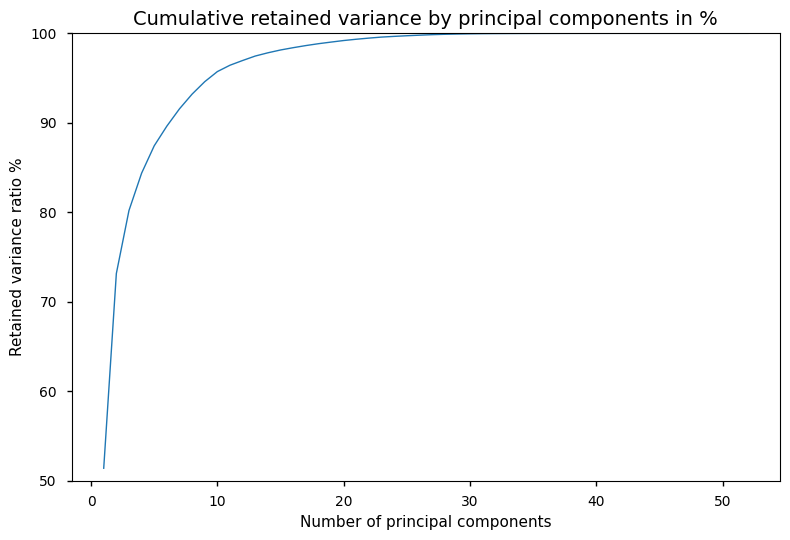

In [13]:
pca = PCA(random_state = 42)
scaler = sklearn.preprocessing.RobustScaler(unit_variance = True)
pca.fit_transform(scaler.fit_transform(pipeline.data_1d_shift.copy().iloc[:,:-1]))
fig = visualizer.draw_cumulative_varience_ratios(np.cumsum(pca.explained_variance_ratio_))
plt.tight_layout()
fig.savefig("../text/Figures/PCA_retained_variance.pdf", dpi=300, format="pdf")
fig.show()

In [14]:
print("Explained variance by component")
pca.explained_variance_ratio_

Explained variance by component


array([5.14098211e-01, 2.17541074e-01, 7.04357689e-02, 4.16686314e-02,
       3.06247295e-02, 2.19821391e-02, 1.93106063e-02, 1.64503169e-02,
       1.38847121e-02, 1.12778103e-02, 7.11137455e-03, 5.26849683e-03,
       4.98165342e-03, 3.61940751e-03, 3.13994890e-03, 2.56899359e-03,
       2.35196583e-03, 2.09255213e-03, 1.80926844e-03, 1.74008567e-03,
       1.44642726e-03, 1.27200992e-03, 1.13645663e-03, 7.84941527e-04,
       7.09112373e-04, 6.22153381e-04, 5.72065210e-04, 4.28625555e-04,
       3.03417109e-04, 2.39932795e-04, 1.71089322e-04, 9.31165977e-05,
       6.16165807e-05, 5.38714249e-05, 3.97852296e-05, 3.48758858e-05,
       2.21651602e-05, 1.55903392e-05, 1.04315298e-05, 8.68463463e-06,
       4.45031619e-06, 3.82194863e-06, 3.04362189e-06, 1.44249271e-06,
       1.03492589e-06, 7.49903273e-07, 5.43489165e-07, 3.05550517e-07,
       2.59518318e-07, 1.41758178e-07, 5.86444809e-08, 3.29240278e-08])

# Full dimensionality - baseline models

The pipeline is always shown for 1 day forecasting. 5 and 10 day forecasting is performed without further comments 

## Full dimensionality - Linear Regression

In [15]:
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = None)
pipe

Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', None), ('scaler 2', None), ('pack_up,', None),
                ('estimator', Ridge(random_state=42))])

In [16]:
LR_PARAMETERS = {"estimator__alpha": np.linspace(0,5,20),
              "estimator__tol":[0.0001, 0.0005,0.001],
              "estimator__max_iter":[200,500,1000,2000]}
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["Full dimensionality"],["BTC-LR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-LR - 1 day"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.52752e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.52752e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.52752e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.52752e-27): r

In [17]:
train_data.columns

Index(['BTC / Addresses, active, count', 'BTC / NVT, adjusted, 90d MA',
       'BTC / NVT, adjusted, free float,  90d MA', 'BTC / NVT, adjusted',
       'BTC / NVT, adjusted, free float', 'BTC / Flow, in, to exchanges, USD',
       'BTC / Flow, out, from exchanges, USD',
       'BTC / Fees, transaction, mean, USD',
       'BTC / Fees, transaction, median, USD', 'BTC / Fees, total, USD',
       'BTC / Miner revenue, USD',
       'BTC / Capitalization, market, free float, USD',
       'BTC / Capitalization, realized, USD',
       'BTC / Capitalization, market, current supply, USD',
       'BTC / Capitalization, market, estimated supply, USD',
       'BTC / Volatility, daily returns, 30d',
       'BTC / Volatility, daily returns, 180d', 'BTC / Difficulty, last',
       'BTC / Difficulty, mean', 'BTC / Hash rate, mean',
       'BTC / Hash rate, mean, 30d', 'BTC / Revenue, per hash unit, USD',
       'BTC / Supply, Miner, held by all mining entities, USD',
       'BTC / Block, size, mean, b

## Full dimensionality - 5 and 10 days - LR

In [18]:
#5 days LR
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = None)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["Full dimensionality"],["BTC-LR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-LR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days LR
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = None)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["Full dimensionality"],["BTC-LR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-LR - 10 days"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.59378e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.59378e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.59378e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.59378e-27): r

## Full dimensionality - Support Vector Regression

In [19]:
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = None)
pipe

Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', None), ('scaler 2', None), ('pack_up,', None),
                ('estimator', LinearSVR(random_state=42))])

In [20]:
SVR_PARAMETERS = {"estimator__C": np.logspace(-10,5,10),
    "estimator__epsilon": [1, 2, 3, 3.5, 4, 4.5, 5],
              "estimator__tol":[0.0001, 0.0005,0.001],
              "estimator__max_iter":[200,500,1000,2000]}
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["Full dimensionality"],["BTC-SVR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-SVR - 1 day"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

In [21]:
print(model.best_params_)
print(model.best_estimator_)
print(model.best_score_)

{'estimator__C': 1e-10, 'estimator__epsilon': 1, 'estimator__max_iter': 200, 'estimator__tol': 0.0001}
Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', None), ('scaler 2', None), ('pack_up,', None),
                ('estimator',
                 LinearSVR(C=1e-10, epsilon=1, max_iter=200, random_state=42))])
-0.04214732401463059


## Full dimensionality - 5 and 10 days - SVR

In [22]:
#5 days SVR
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = None)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["Full dimensionality"],["BTC-SVR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-SVR - 5 days"]] = rmse(test_target,
                                                                prediction)

#10 days SVR
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = None)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["Full dimensionality"],["BTC-SVR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-SVR - 10 days"]] = rmse(test_target,
                                                                prediction)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

/tmp/ipykernel_6922/2488864839.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


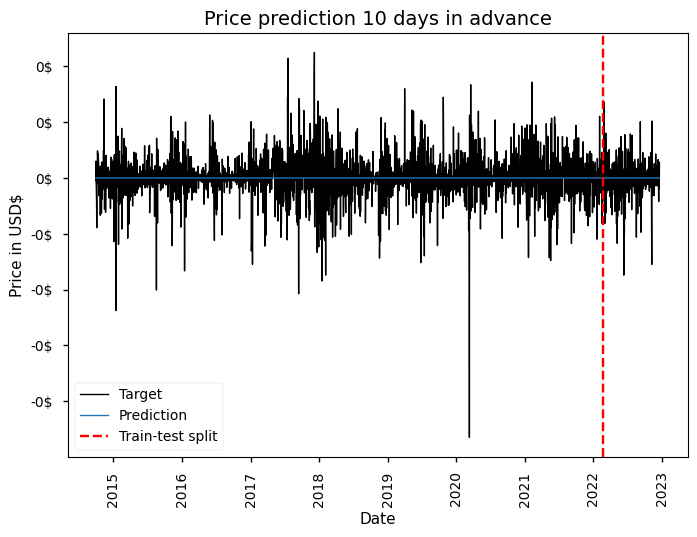

In [23]:
test_prediction = pd.Series(prediction, index=test_data.index)
train_pred = pd.Series(model.predict(train_data), index=train_data.index)
visualizer = Visualizer()
fig = visualizer.draw_prediction_full(train_target,train_pred, test_target, test_prediction, 10)
fig.show()

/tmp/ipykernel_6922/4071368209.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


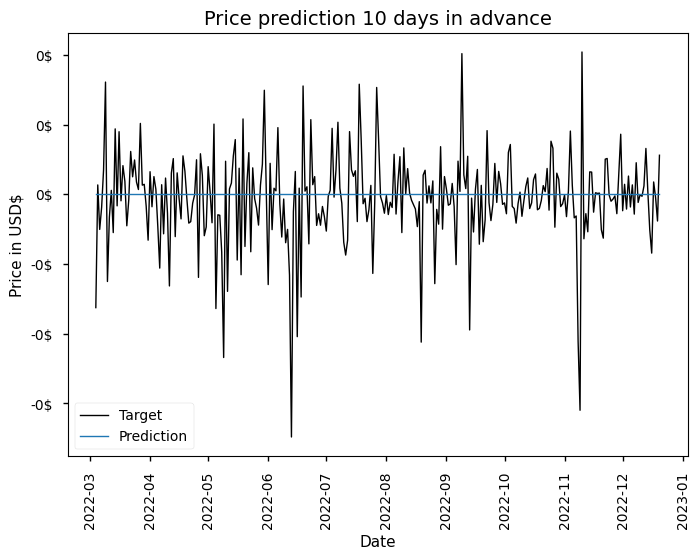

In [24]:
fig = visualizer.draw_prediction_test(test_target, test_prediction, 10)
fig.show()

## Full dimensionality - LTSM


In [25]:
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=1, random_state = 42, shuffle = True, 
                    batch_size = 200,epochs=300, input_shape=(6, 53),
                    units = 500), dim_reducer = None, shape_change = ((-1, 53), (-1,6,53)))
pipe

Pipeline(steps=[('pack_down', ReshapeTransformer(new_shape=(-1, 53))),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', None), ('scaler 2', None),
                ('pack_up,', ReshapeTransformer(new_shape=(-1, 6, 53))),
                ('estimator',
                 KerasRegressor(batch_size=200, build_fn=<function Pipeline.assembly_lstm at 0x7f437ffa5620>, epochs=300, input_shape=(6, 53), random_state=42, units=500))])

In [26]:
LSTM_PARAMETERS = {"estimator__units": [500],
    "estimator__epochs": [300]}
x,y = Pipeline.create_lstm_input(pipeline.data_1d_shift.copy(), pipeline.data_1d_shift.copy().iloc[:,-1], 6)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
#TODO: fix scaling target sequentially (seperately for both splits)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["Full dimensionality"],["BTC-LSTM - 1 day"]] = rmse(minimax.inverse_transform(train_target.reshape(-1,1)), minimax.inverse_transform(model.predict(train_data).reshape(-1,1)))
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-LSTM - 1 day"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/300
5/5 [==============================] - 6s 23ms/step - loss: 1.4814
Epoch 2/300
5/5 [==============================] - 0s 13ms/step - loss: 0.4720
Epoch 3/300
5/5 [==============================] - 0s 11ms/step - loss: 0.2992
Epoch 4/300
5/5 [==============================] - 0s 10ms/step - loss: 0.2405
Epoch 5/300
5/5 [==============================] - 0s 10ms/step - loss: 0.2150
Epoch 6/300
5/5 [==============================] - 0s 9ms/step - loss: 0.2047
Epoch 7/300
5/5 [==============================] - 0s 10ms/step - loss: 0.1403
Epoch 8/300
5/5 [==============================] - 0s 9ms/step - loss: 0.1265
Epoch 9/300
5/5 [==============================] - 0s 9ms/step - loss: 0.1028
Epoch 10/300
5/5 [==============================] - 0s 9ms/step - loss: 0.0878
Epoch 11/300
5/5 [==============================] - 0s 9ms/step - loss: 0.0963
Epoch 12/300
5/5 [==============================] - 0s 10ms/step - loss: 0.0756
Epoch 13/300
5/5 [==============================] - 0s

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/300
10/10 [==============================] - 3s 10ms/step - loss: 1.1282
Epoch 2/300
10/10 [==============================] - 0s 9ms/step - loss: 0.3332
Epoch 3/300
10/10 [==============================] - 0s 9ms/step - loss: 0.1912
Epoch 4/300
10/10 [==============================] - 0s 9ms/step - loss: 0.1317
Epoch 5/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0882
Epoch 6/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0731
Epoch 7/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0772
Epoch 8/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0704
Epoch 9/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0677
Epoch 10/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0672
Epoch 11/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0632
Epoch 12/300
10/10 [==============================] - 0s 8ms/step - loss: 0.0617
Epoch 13/300
10/10 [================

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/300
14/14 [==============================] - 3s 10ms/step - loss: 0.8347
Epoch 2/300
14/14 [==============================] - 0s 9ms/step - loss: 0.2034
Epoch 3/300
14/14 [==============================] - 0s 8ms/step - loss: 0.1358
Epoch 4/300
14/14 [==============================] - 0s 8ms/step - loss: 0.0946
Epoch 5/300
14/14 [==============================] - 0s 8ms/step - loss: 0.0797
Epoch 6/300
14/14 [==============================] - 0s 9ms/step - loss: 0.0651
Epoch 7/300
14/14 [==============================] - 0s 8ms/step - loss: 0.0624
Epoch 8/300
14/14 [==============================] - 0s 9ms/step - loss: 0.0658
Epoch 9/300
14/14 [==============================] - 0s 9ms/step - loss: 0.0676
Epoch 10/300
14/14 [==============================] - 0s 9ms/step - loss: 0.0658
Epoch 11/300
14/14 [==============================] - 0s 8ms/step - loss: 0.0625
Epoch 12/300
14/14 [==============================] - 0s 8ms/step - loss: 0.0608
Epoch 13/300
14/14 [================

In [34]:
model.best_params_
model.best_score_


-0.3611779436623014

2/2 [==============================] - 0s 4ms/step


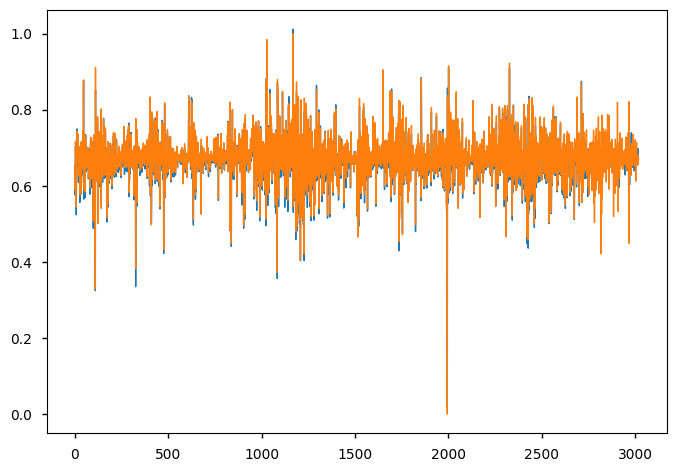

In [33]:
plt.plot(np.concatenate([model.predict(train_data), model.predict(test_data)]), linewidth=1)
plt.plot(np.concatenate([train_target,test_target]), linewidth=1)

In [29]:
test_prediction = pd.Series(prediction, index=test_data.index)
train_pred = pd.Series(model.predict(train_data), index=train_data.index)
visualizer = Visualizer()
fig = visualizer.draw_prediction_full(train_target,train_pred, test_target, test_prediction, 10)
fig.show()

AttributeError: 'numpy.ndarray' object has no attribute 'index'

## Full dimensionality - 5 and 10 days - LSTM

In [ ]:
#5 days LSTM
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = None, shape_change = ((-1, 52), (-1,1,52)))
x,y = Pipeline.create_lstm_input(pipeline.data_5d_shift.copy(), pipeline.data_5d_shift.copy().iloc[:,-1], 1, 5)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["Full dimensionality"],["BTC-LSTM - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-LSTM - 5 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = None, shape_change = ((-1, 52), (-1,1,52)))
x,y = Pipeline.create_lstm_input(pipeline.data_10d_shift.copy(), pipeline.data_10d_shift.copy().iloc[:,-1], 1, 10)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["Full dimensionality"],["BTC-LSTM - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-LSTM - 10 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

# Retained 95% of variance

## Retained 95% of variance - Linear Regression

In [ ]:
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
pipe

In [ ]:
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["95% retained variance"],["BTC-LR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-LR - 1 day"]] = rmse(test_target,
                                                                prediction)

In [ ]:
#5 days LR
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["95% retained variance"],["BTC-LR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-LR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days LR
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["95% retained variance"],["BTC-LR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-LR - 10 days"]] = rmse(test_target,
                                                                prediction)

## Retained 95% of variance - Support Vector Regression

In [ ]:
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
pipe

In [ ]:
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["95% retained variance"],["BTC-SVR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-SVR - 1 day"]] = rmse(test_target,
                                                                prediction)

## Retained 95% of variance - 5 and 10 days - SVR

In [ ]:
#5 days SVR
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["95% retained variance"],["BTC-SVR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-SVR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days SVR
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["95% retained variance"],["BTC-SVR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-SVR - 10 days"]] = rmse(test_target,
                                                                prediction)

## Retained 95% of variance - LSTM

In [ ]:
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
pipe

In [ ]:
results_test

In [ ]:
x,y = Pipeline.create_lstm_input(pipeline.data_1d_shift.copy(), pipeline.data_1d_shift.copy().iloc[:,-1], 1, 1)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["95% retained variance"],["BTC-LSTM - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-LSTM - 1 day"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

## Retained 95% of variance - 5 and 10 days - LSTM

In [ ]:
#5 days LSTM
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
x,y = Pipeline.create_lstm_input(pipeline.data_5d_shift.copy(), pipeline.data_5d_shift.copy().iloc[:,-1], 1, 5)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["95% retained variance"],["BTC-LSTM - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-LSTM - 5 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))
#10 days LSTM
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
x,y = Pipeline.create_lstm_input(pipeline.data_10d_shift.copy(), pipeline.data_10d_shift.copy().iloc[:,-1], 1, 10)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["95% retained variance"],["BTC-LSTM - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-LSTM - 10 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

# Retained 98% of variance

## Retained 98% of variance - Linear Regression

In [ ]:
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
pipe

In [ ]:
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_1d_shift)
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["98% retained variance"],["BTC-LR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-LR - 1 day"]] = rmse(test_target,
                                                                prediction)

In [ ]:
#5 days LR
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["98% retained variance"],["BTC-LR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-LR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days LR
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["98% retained variance"],["BTC-LR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-LR - 10 days"]] = rmse(test_target,
                                                                prediction)

## Retained 98% of variance - Support Vector Regression

In [ ]:
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
pipe

In [ ]:
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["98% retained variance"],["BTC-SVR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-SVR - 1 day"]] = rmse(test_target,
                                                                prediction)

## Retained 98% of variance - 5 and 10 days - SVR

In [ ]:
#5 days SVR
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["98% retained variance"],["BTC-SVR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-SVR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days SVR
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["98% retained variance"],["BTC-SVR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-SVR - 10 days"]] = rmse(test_target,
                                                                prediction)

## Retained 98% of variance - LSTM

In [ ]:
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
pipe

In [ ]:
x,y = Pipeline.create_lstm_input(pipeline.data_1d_shift.copy(), pipeline.data_1d_shift.copy().iloc[:,-1], 1, 1)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["98% retained variance"],["BTC-LSTM - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-LSTM - 1 day"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

## Retained 98% of variance - 5 and 10 days - LSTM

In [ ]:
#5 days LSTM
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
x,y = Pipeline.create_lstm_input(pipeline.data_5d_shift.copy(), pipeline.data_5d_shift.copy().iloc[:,-1], 1, 5)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["98% retained variance"],["BTC-LSTM - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-LSTM - 5 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))
#10 days LSTM
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
x,y = Pipeline.create_lstm_input(pipeline.data_10d_shift.copy(), pipeline.data_10d_shift.copy().iloc[:,-1], 1, 10)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["98% retained variance"],["BTC-LSTM - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-LSTM - 10 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

# Retained 99% of variance

## Retained 99% of variance - Linear Regression

In [ ]:
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
pipe

In [ ]:
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["99% retained variance"],["BTC-LR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-LR - 1 day"]] = rmse(test_target,
                                                                prediction)

In [ ]:
#5 days LR
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["99% retained variance"],["BTC-LR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-LR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days LR
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["99% retained variance"],["BTC-LR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-LR - 10 days"]] = rmse(test_target,
                                                                prediction)

## Retained 99% of variance - Support Vector Regression

In [ ]:
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
pipe

In [ ]:
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["99% retained variance"],["BTC-SVR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-SVR - 1 day"]] = rmse(test_target,
                                                                prediction)

In [ ]:
#5 days SVR
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["99% retained variance"],["BTC-SVR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-SVR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days SVR
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["99% retained variance"],["BTC-SVR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-SVR - 10 days"]] = rmse(test_target,
                                                                prediction)

In [ ]:
test_prediction = pd.Series(prediction, index=test_data.index)
train_pred = pd.Series(model.predict(train_data), index=train_data.index)
visualizer = Visualizer()
fig = visualizer.draw_prediction_full(train_target,train_pred, test_target, test_prediction, 10)
fig.show()

## Retained 99% of variance - LSTM

In [ ]:
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
pipe

In [ ]:
x,y = Pipeline.create_lstm_input(pipeline.data_1d_shift.copy(), pipeline.data_1d_shift.copy().iloc[:,-1], 1, 1)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["99% retained variance"],["BTC-LSTM - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-LSTM - 1 day"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

In [ ]:
#5 days LSTM
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
x,y = Pipeline.create_lstm_input(pipeline.data_5d_shift.copy(), pipeline.data_5d_shift.copy().iloc[:,-1], 1, 5)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["99% retained variance"],["BTC-LSTM - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-LSTM - 5 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))
#10 days LSTM
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
x,y = Pipeline.create_lstm_input(pipeline.data_10d_shift.copy(), pipeline.data_10d_shift.copy().iloc[:,-1], 1, 10)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["99% retained variance"],["BTC-LSTM - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-LSTM - 10 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

In [ ]:
results_test